# 8. GUI

## 8.1 학습내용

### 8.1.1 목표

* 화면을 만들 수 있다.
* 화면의 이벤트 처리할 수 있다.
* 그림을 그릴 수 있다.

### 8.1.2 문제

* 문제 gui-1: 원 면적을 계산하는 화면을 만든다. 
* 문제 gui-2: 원 면적을 계산버튼을 누르면 면적을 계산한다.

## 8.2 GUI  소개

### 8.2.1 GUI란?

* GUI는 컴퓨터를 사용하는 환경으로, '그림'으로 제공된다. 그림의 위치가 의미가 있어 마우스로 동작을 하면 그 위치와 연결된 메뉴, 버튼, 스크롤과 같은 기능을 사용할 수 있다.

구분 | GUI | CUI
-----|-----|-----
약어 | Graphical User Interface | Character UI
명령어 입력 | 주로 마우스 입력 | 주로 키보드 입력
예 | 윈도우 | DOS, Terminal

### 8.2.2 GUI 구성

* 자바는 2개의 패키지로 GUI를 만든다.
* 초기에는 AWT 패키지로 만들었고, 다음에 Swing 패키지를 추가했다.
    * AWT (Abstract Widget Toolkit)
    * Swing (AWT기반으로 만들어졌다) (클래스 앞에 J를 붙인다.)

* Swing GUI는 Swing container를 만들고 그 안에 GUI components를 넣는다.
* Swing containers의 종류
    1. JFrame
        * GUI 윈도우
        * JFrame은 JRootPane이 최상위에 있고 그 안에 (1) glass pane, (2) layered pane, (3) content pane, (4) optional menu bar를 가지고 있다.
    2. 다른 containers의 예

Swing containers | 설명 | 예
----------|----------|----------
javax.swing.JPanel | 자체로 윈도우가 될 수 없다. components를 구성해서 JFrame로 add | 
javax.swing.JDialog | 대화 창을 만듦 | JOptionPane
javax.swing.JScrollPane | 스크롤바 추가 | 


* AWT, Swing에서 사용할 수 있는 관련 클래스

awt,swing 요소 | 설명
----------|----------
Component | awt 그림 객체 (button, checkboxes, scrollbars)
Container | awt container.  awt components를 가질 수 있다.
Window | 최상위 윈도우. 제목과 테두리가 없다.
Frame | 최상위 윈도우. 제목과 테두리가 있다.
JFrame | 윈도우 창. swing을 사용할 수 있게 Frame 확장. getContentPane()으로 container를 만들어 사용.
JComponent | 모든 swing components (JFrame, JDialog, JApplet과 같은 container제외)
JPanel | 가벼운 container. JFrame과 달리 그 자체로 존재할 수 없다.
LayoutManager | setLayout()

* 아래 GUI 관련 클래스를 나타낸 GUI에서, Component, JComponent의 paint(), repaint() 함수를 주의한다.
    * paintComponent()는 Swing JComponent에 있다.
    * paint(), repaint()는 Component에 있고, JComponent가 상속받는다.
    * repaint()는 인자가 생략되었다.


In [3]:
import iplantuml

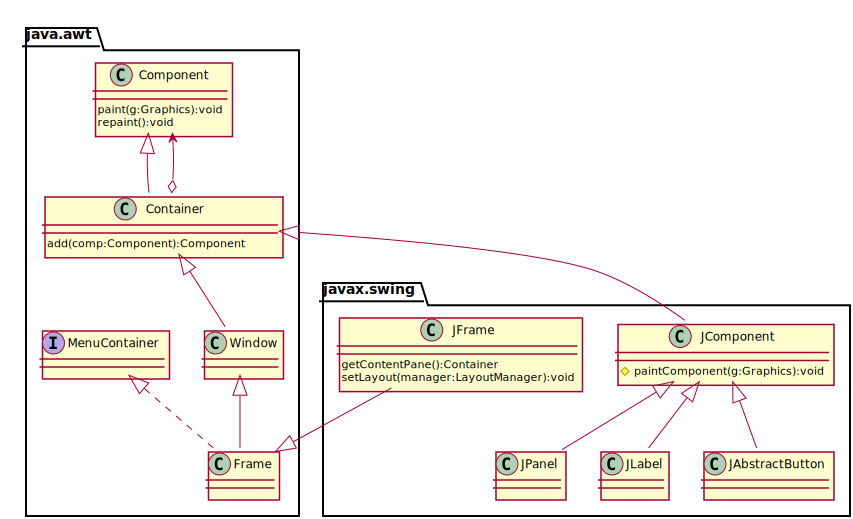

In [14]:
%%plantuml
@startuml
package java.awt {
    class Component {
        paint(g:Graphics):void
        repaint():void
    }
    class Container {
        add(comp:Component):Component       
    }
    class Window
    class Frame
    interface MenuContainer
    Component <|-- Container
    Container o-up->Component
    Container <|-- Window
    Window <|-- Frame
    MenuContainer <|.. Frame
    Frame <|-left- javax.swing.JFrame
    Container <|-- javax.swing.JComponent
}
package javax.swing {
    class JFrame{
        getContentPane():Container
        setLayout(manager:LayoutManager):void
    }
    class JPanel
    class JLabel
    class JAbstractButton
    class JComponent {
        #paintComponent(g:Graphics):void
    }
    JComponent <|-- JPanel
    JComponent <|-- JLabel
    JComponent <|-- JAbstractButton
}
@enduml


* GUI를 만드는 일반적인 절차
    * 윈도우 창을 띄운다. 창은 그 안에 화면요소를 가지고 있다.
    * 이벤트를 기다리고 처리한다.
        * 사용자의 키보드 또는 마우스 이벤트를 대기한다.
        * 이벤트가 발생하면 핸들러가 처리한다.

단계 | 작업 | 요소 | 예
-------|-------|-------|-------
1 | 창을 띄운다. | Window | JFrame
2 | GUI 요소를 넣을 가상의 공간을 만든다. | Container | JFrame.getContentPane() 또는 JPanel
3 | GUI 요소를 만든다 | GUI Components | JButton
4 | GUI 요소를 넣을 위치를 잡는다 | Layout | FlowLayout
5 | GUI 요소를 넣는다 | Container에 add() | add(new Panel())
6 | GUI 요소에 이벤트 핸들러를 넣는다. | | MouseListener


* Layout managers
    * FlowLayout
    * GridLayyout
    * BorderLayout
    * CardLayout

* Event Handling

Interface | Methods
----------|----------
java.awt.event.MouseListener | public void mouseClicked(MouseEvent e);<br>public void mousePressed(MouseEvent e);<br>public void mouseReleased(MouseEvent e);<br>public void mouseEntered(MouseEvent e);<br>public void mouseExited(MouseEvent e);
java.awt.event.MouseWheelListener | public void mouseWheelMoved(MouseWheelEvent e);
java.awt.event.MouseMotionListener | public void mouseDragged(MouseEvent e);<br>public void mouseMoved(MouseEvent e);

## 8.1 Simple Window

* 윈도우 창은 JFrame으로 만든다.
    ```
    JFrame frame=new JFrame();
    ```

* JFrame을 띄운다.
    ```
    frame.setVisible(true);
    ```

* JFrame의 크기를 정의한다.

    ```
    frame.setSize(100,200);
    ```

### jshell session

* 단순한 창

In [ ]:
import javax.swing.JFrame;
JFrame frame=new JFrame();
frame.setSize(100,200);
frame.setVisible(true);

* 속성변경하기

In [ ]:
frame.setTitle("Hello");

### 매우 단순한 윈도우

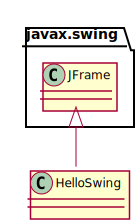

In [7]:
%%plantuml
@startuml
class javax.swing.JFrame
class HelloSwing
javax.swing.JFrame <|-- HelloSwing
@enduml

* HelloSwing 창을 JFrame에서 상속받아서 생성한다.
* 앞서 JFrame의 객체를 생성해서 사용하는 것과 다른 방식이다.

In [13]:
import javax.swing.JFrame;
class HelloSwing extends JFrame {
    public HelloSwing() {
        setTitle("Hello");
        setSize(400, 400);
        setVisible(true);
    }
}

 import javax.swing.JFrame;

 class HelloSwing extends JFrame {
     public HelloSwing() {
         setTitle("Hello");
         setSize(400, 400);
     }
 }
|  Replaced class HelloSwing
|    Update replaced variable hello which cannot be referenced until this error is corrected: 
|      constructor HelloSwing in class HelloSwing cannot be applied to given types;
|        required: no arguments
|        found: java.lang.String
|        reason: actual and formal argument lists differ in length
|      HelloSwing hello=new HelloSwing("Hello");
|                       ^---------------------^
|    Update overwrote class HelloSwing



In [14]:
HelloSwing hello=new HelloSwing();
hello.show();

 HelloSwing hello=new HelloSwing();
|  Replaced variable hello of type HelloSwing with initial value HelloSwing[frame2,0,24,400x400,invalid,hidden,layout=java.awt.BorderLayout,title=Hello,resizable,normal,defaultCloseOperation=HIDE_ON_CLOSE,rootPane=javax.swing.JRootPane[,0,0,0x0,invalid,layout=javax.swing.JRootPane$RootLayout,alignmentX=0.0,alignmentY=0.0,border=,flags=16777673,maximumSize=,minimumSize=,preferredSize=],rootPaneCheckingEnabled=true]
|    Update overwrote variable hello

 hello.show();



### 조금 진화한 윈도우

* JFrame 창을 만든다.    
```
JFrame frame=new JFrame();    
```

* JFrame안에 container를 만든다.
```
frame.getContentPane();
```

* 버튼을 만들어 넣는다.
```
JButton button=new JButton("hello");
add(button);
```

* 위치를 잡는다.
```
setLayout(new GroupLayout(pane));
```

* 디스플레이
```
frame.setSize(100,100);
frame.setVisible(true);
```

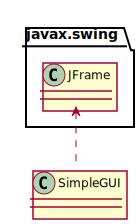

In [12]:
%%plantuml
@startuml
class javax.swing.JFrame
class SimpleGUI
SimpleGUI .up.>javax.swing.JFrame
@enduml

In [ ]:
# %load src/com/sd/gui/SimpleGUI.java
package com.sd.gui;

import javax.swing.JFrame;
import javax.swing.JButton;
import java.awt.Container;

class SimpleGUI {
    public void sayHello() {
        JFrame frame=new JFrame();
        JButton button=new JButton("hello");
        frame.setDefaultCloseOperation(JFrame.EXIT_ON_CLOSE);
        //frame.getContentPane().add(button);
        Container pane=frame.getContentPane();
        pane.add(button);
        //GroupLayout gl = new GroupLayout(pane);
        //pane.setLayout(gl);
        frame.setSize(100,100);
        frame.setVisible(true);
    }
}


In [ ]:
!javac -d classes/ -sourcepath src/ src/com/sd/gui/SimpleGUI.java

In [11]:
/classpath ./classes

 /classpath ./classes
|  Path './classes' added to classpath



In [12]:
import com.sd.gui.SimpleGUI;

 import com.sd.gui.SimpleGUI;
|  Error:
|  com.sd.gui.SimpleGUI is not public in com.sd.gui; cannot be accessed from outside package
|  import com.sd.gui.SimpleGUI;
|         ^------------------^



In [13]:
SimpleGUI gui=new SimpleGUI();

 SimpleGUI gui=new SimpleGUI();
|  Error:
|  cannot find symbol
|    symbol:   class SimpleGUI
|  SimpleGUI gui=new SimpleGUI();
|  ^-------^
|  Error:
|  cannot find symbol
|    symbol:   class SimpleGUI
|  SimpleGUI gui=new SimpleGUI();
|                    ^-------^



In [3]:
gui.sayHello();

 gui.sayHello();



## 문제 gui-1: 원 면적을 계산하는 화면을 만든다. 

* 반지름, 면적을 입력하는 화면을 만든다.
* 계산, 취소 버튼을 만든다.
* 버튼을 눌러도 아직 실행되는 기능은 없다.

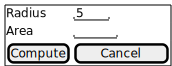

In [3]:
%%plantuml
@startsalt
{+
  Radius    | "5   "
  Area      | "     "
  [Compute] | [  Cancel   ]
}
@endsalt

## 8.2 Event and Listener

* 버튼을 Listener에 추가한다.
    ```
    b1.addActionListener(new MyListener());
    ```

* Mouse의 event가 발생하면 ActionListener의 actionPerformed를 호출.
    ```
    actionPerformed(ActionEvent e)
    ```

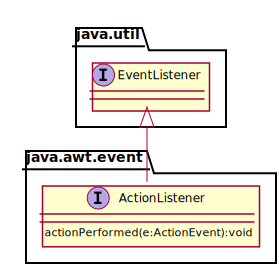

In [6]:
%%plantuml
@startuml

interface java.util.EventListener
interface java.awt.event.ActionListener {
    actionPerformed(e:ActionEvent):void
}
java.util.EventListener <|-- java.awt.event.ActionListener
@enduml


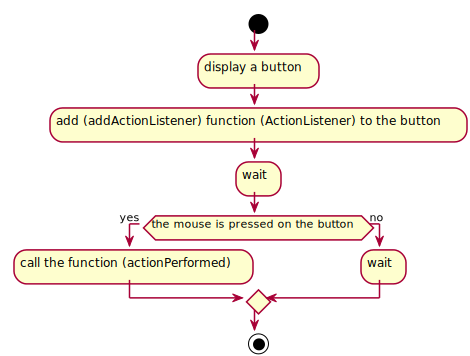

In [11]:
%%plantuml
@startuml
start
:display a button;
:add (addActionListener) function (ActionListener) to the button;
:wait;
if (the mouse is pressed on the button) then (yes)
    :call the function (actionPerformed);
else (no)
    :wait;
endif
stop
@enduml

## 문제 gui-2:  원 면적을 계산버튼을 누르면 면적을 계산한다.

* 계산 버튼을 누르면 면적을 계산한다.
    * 버튼에 '면적을 계산'하는 기능을 묶는다. 버튼과 기능을 binding한다는 의미로 묶는다.
    * 버튼에 마우스를 가져가 누르면, 그 이벤트를 인식한다.
    * 앞서 매단 '면적을 계산'하는 기능을 실행한다.
* '취소'버튼을 누르면 반지름을 지운다.

## 8.3 Simple Drawing

* 윈도우에는 그림을 그릴 수 있다.
    * AWT 최상위 클래스 Component의 paint(), repaint()를 사용한다.
    * paint()함수
        * 처음 frame을 그릴 때 (setVisible(True)) 사용한다.
        * frame이 변경될 때 사용한다.
    * paint()함수는 자동으로 호출되므로, 호출하지 않는다. 호출하면 오류가 발생한다. 대신 repaint()를 호출한다.
    * repaint()함수는 update()와 paint()를 순차적으로 호출한다.
        ```
        void	paint(Graphics g)
        void	repaint()
        ```

* Swing 그리기는 AWT와 유사하지만, paintCompoent()함수가 있다.
    * Swing에 JComponent, JPanel 클래스 등이 해당된다.
    * paint()함수는 paintComponent()를 호출한다.
        * 실제로는 paintBorder(), paintComponent(), paintChildren()를 모두 호출한다.
        * paint()함수를 재정의하지 않는다. 대신 paintComponent()에 그리는 프로그램을 넣으면 된다.
            ```
            paintComponent(Graphics g)
            repaint()
            ```
